<a href="https://colab.research.google.com/github/shubham-kumr/heart_disease_prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [184]:
data = pd.read_csv("heart.csv")

In [87]:
type(data)

pandas.core.frame.DataFrame

In [185]:
data.shape

(303, 14)

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [13]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [14]:
data.isnull().sum().sum()

0

In [15]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


# **Exploratory Data Analysis**

In [15]:
y = data["target"]

target
1    165
0    138
Name: count, dtype: int64


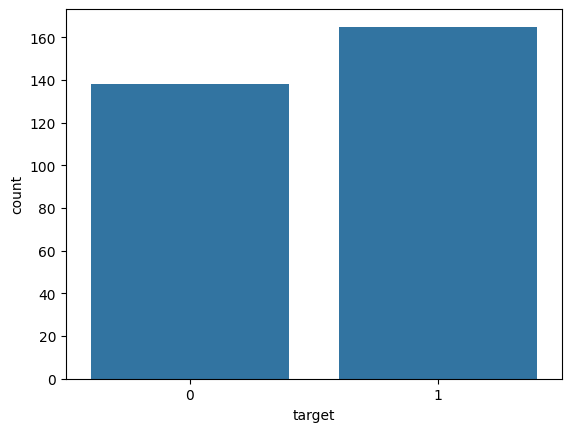

In [16]:
ax = sns.countplot(x=y)
target_temp = y.value_counts()
print(target_temp)
plt.show()

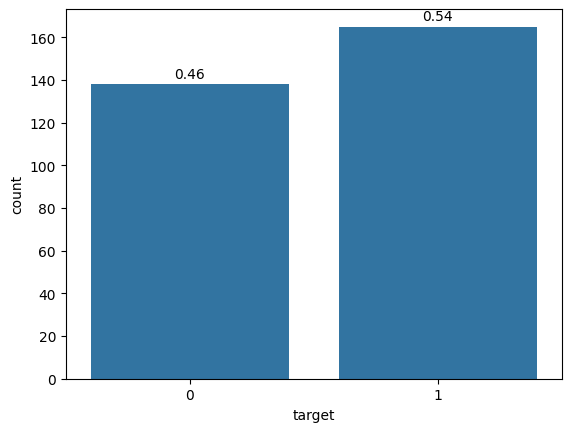

In [17]:
ax = sns.countplot(x=y)
target_temp = y.value_counts()
total = target_temp.sum()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:.2f}'.format(height / total), ha="center")

# **Percentage of patient with or without heart problems in the given dataset**

In [18]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [19]:
data["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

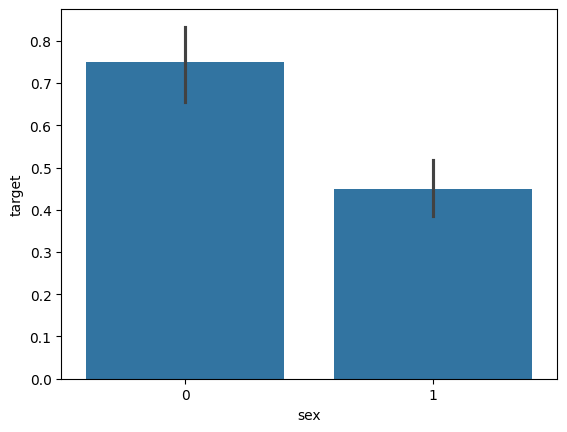

In [20]:
sns.barplot(x="sex", y="target", data=data)

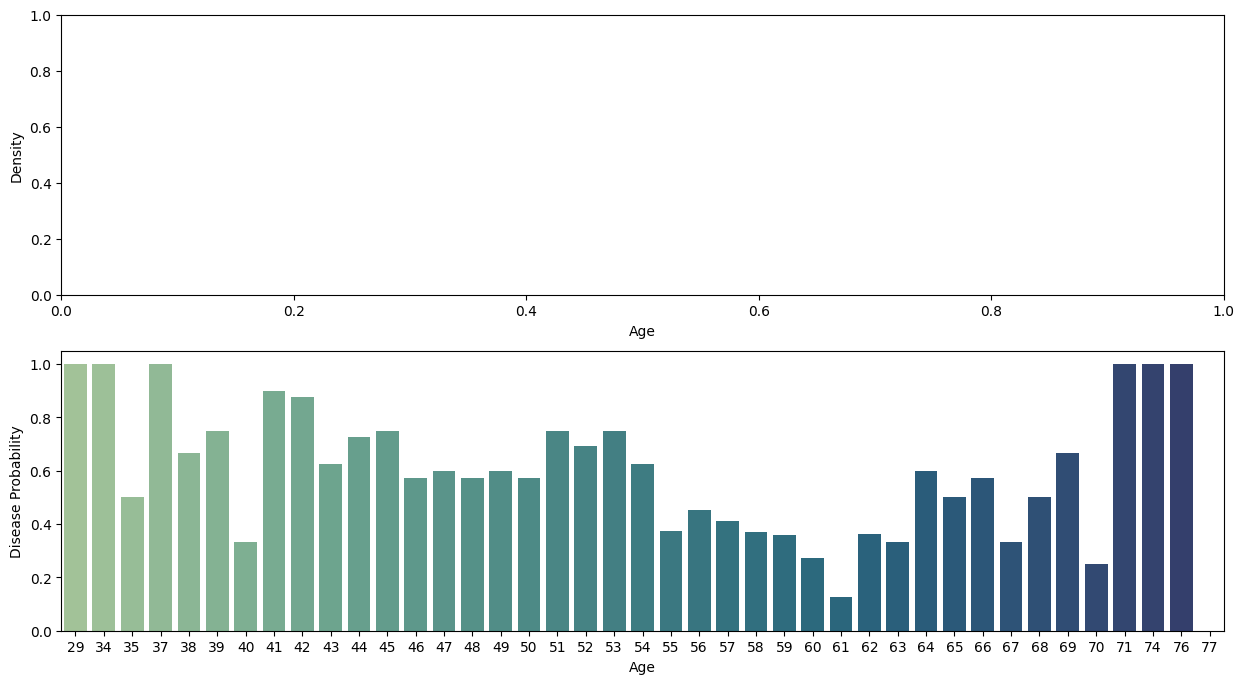

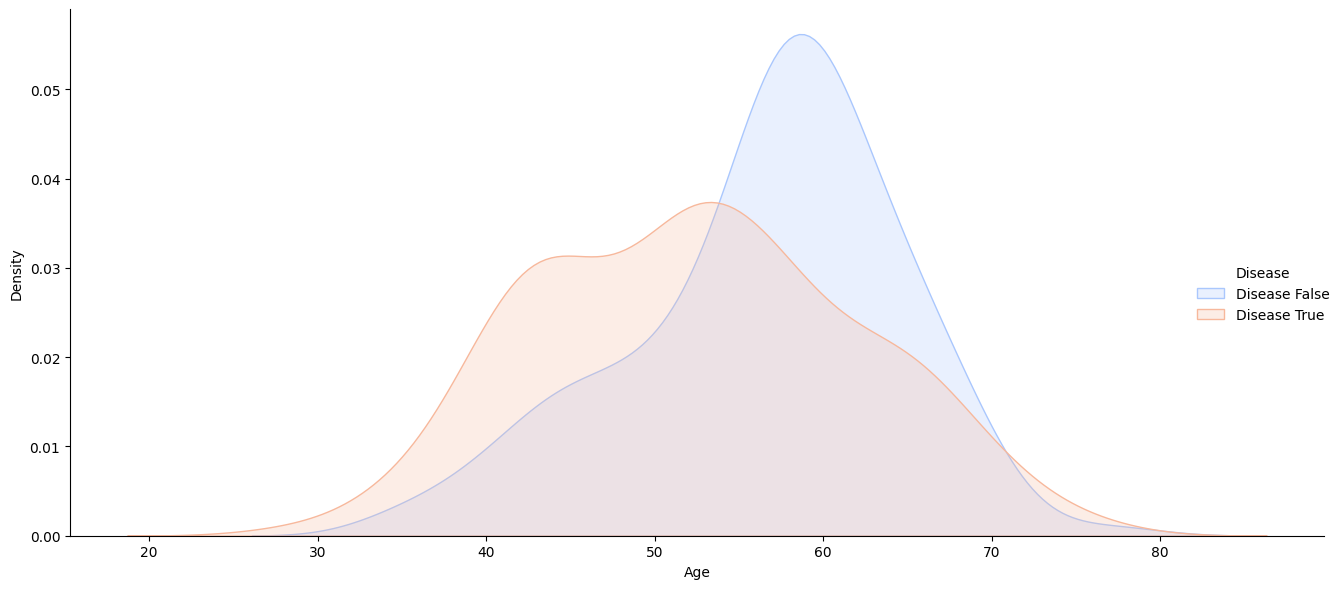

In [21]:
def plotAge(data, axes):
    facet_grid = sns.FacetGrid(data, hue='target', height=6, aspect=2, palette='coolwarm')

    facet_grid.map(sns.kdeplot, "age", shade=True)
    facet_grid.set_axis_labels('Age', 'Density')

    facet_grid.add_legend(title='Disease', labels=['Disease False', 'Disease True'])

    avg = data[["age", "target"]].groupby(['age'], as_index=False).mean()

    sns.barplot(x='age', y='target', data=avg, ax=axes[1], palette='crest')
    axes[1].set(xlabel='Age', ylabel='Disease Probability')

    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
plotAge(data, axes)


### **Here 0 is female and 1 is male patients**

In [22]:
female_count = len(data[data['sex'] == 0])
male_count = len(data[data['sex'] == 1])

female_percentage = (female_count / len(data)) * 100
male_percentage = (male_count / len(data)) * 100

print(f"Percentage of Female Patients: {female_percentage:.2f}%")
print(f"Percentage of Male Patients: {male_percentage:.2f}%")

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [23]:
categorial = [('sex', ['female', 'male']),
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']),
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']),
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']),
              ('exang', ['yes', 'no']),
              ('slope', ['upsloping', 'flat', 'downsloping']),
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [24]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)]
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

In [25]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])

    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

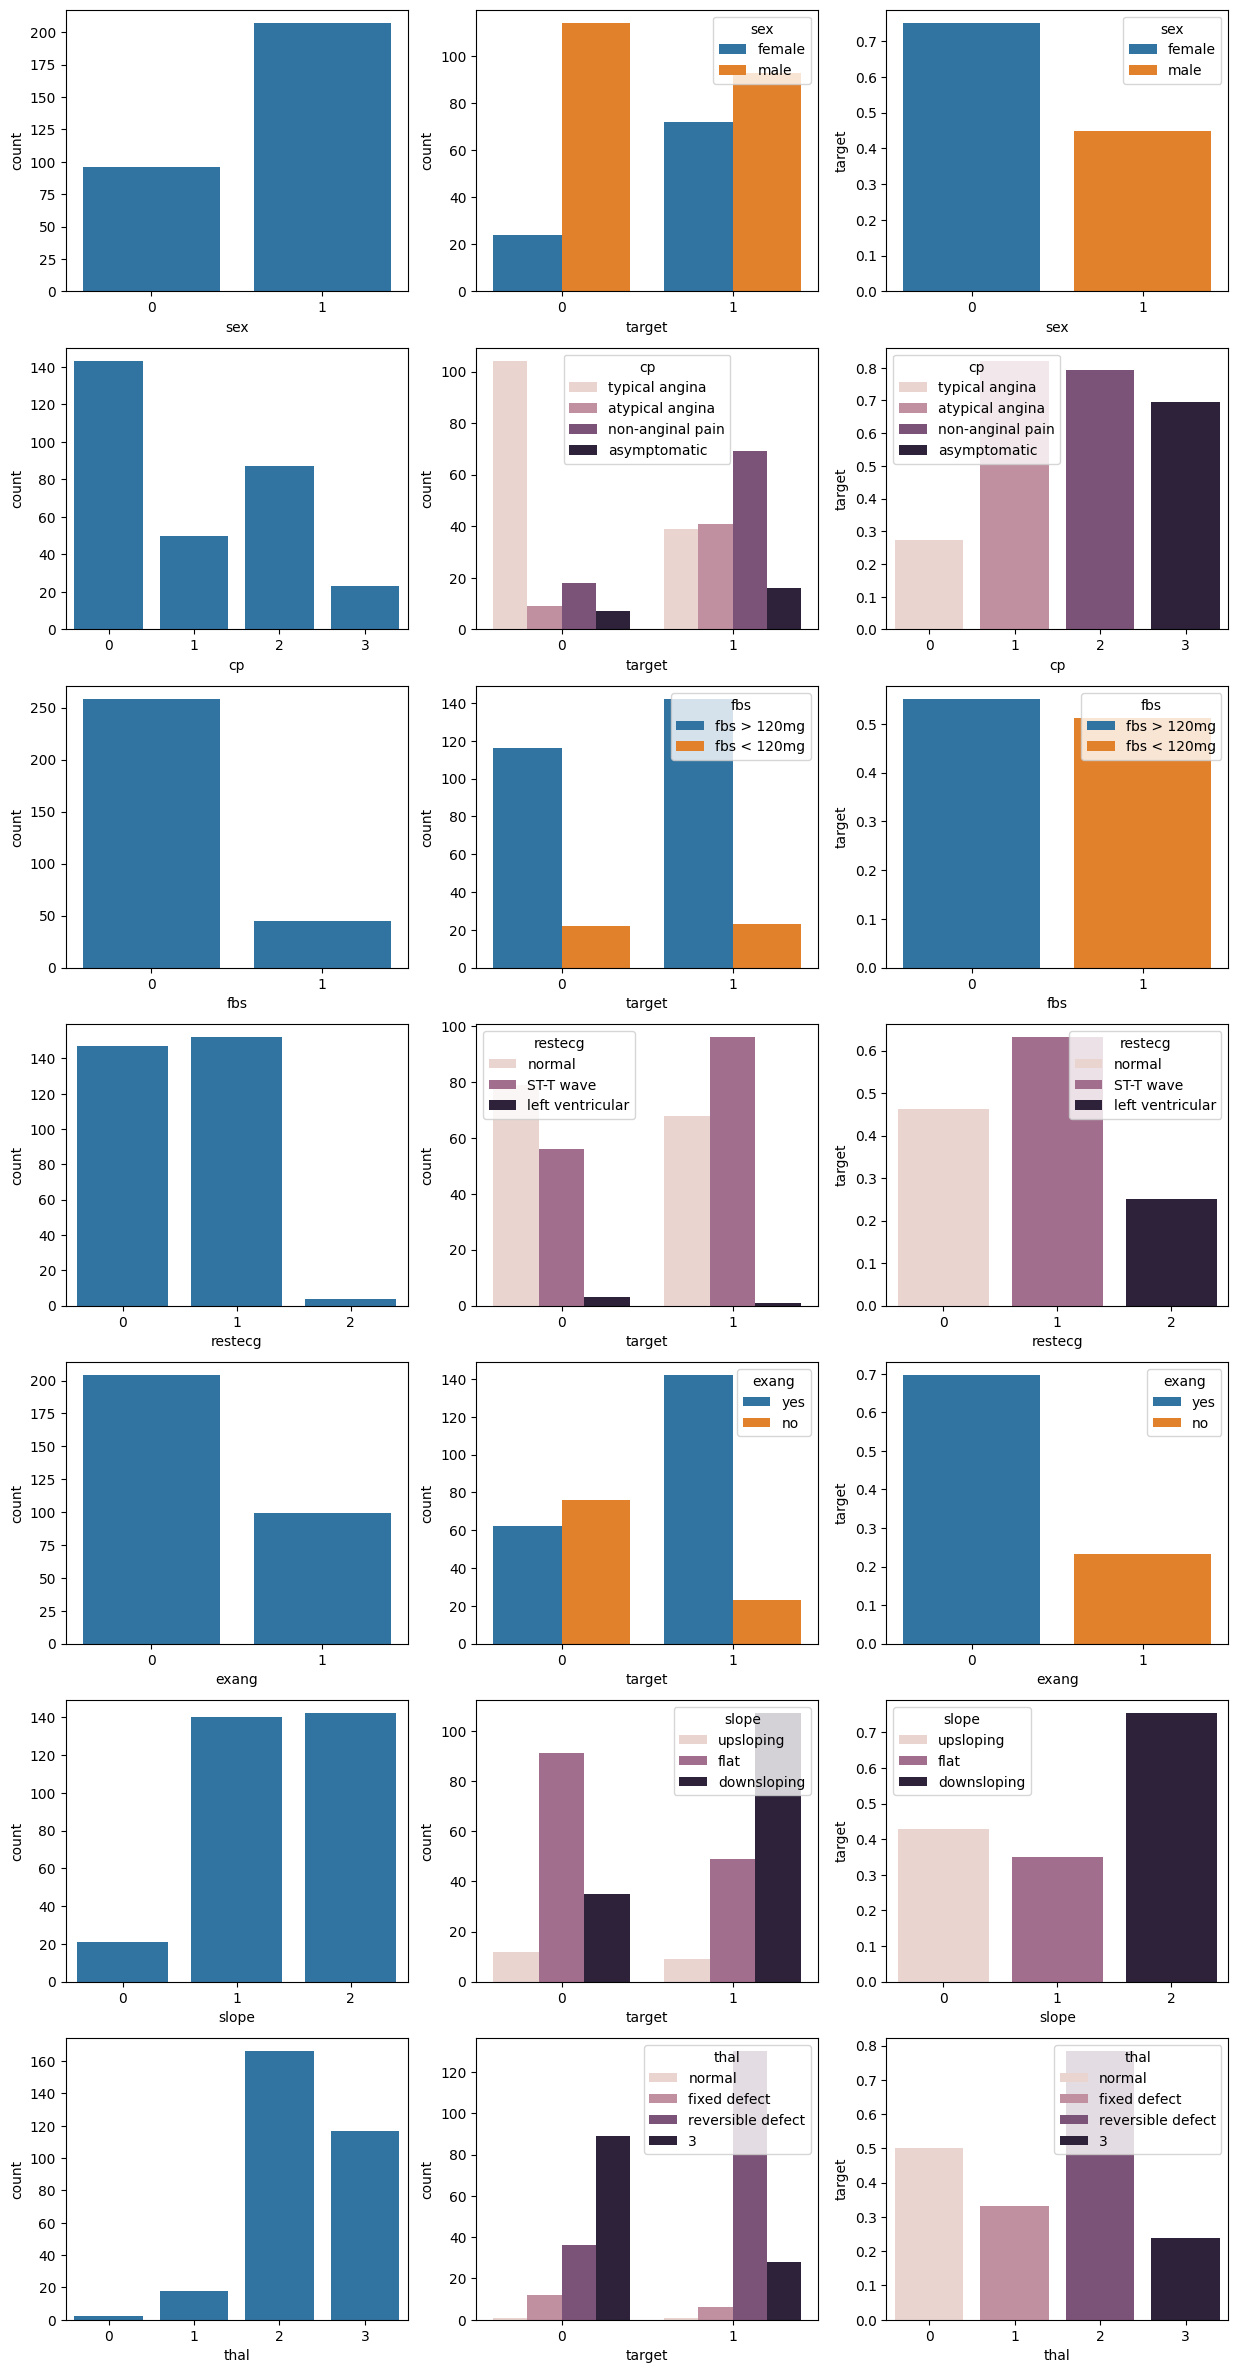

In [26]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [27]:
continuous = [('trestbps', 'blood pressure in mm Hg'),
              ('chol', 'serum cholestoral in mg/d'),
              ('thalach', 'maximum heart rate achieved'),
              ('oldpeak', 'ST depression by exercise relative to rest'),
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [28]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

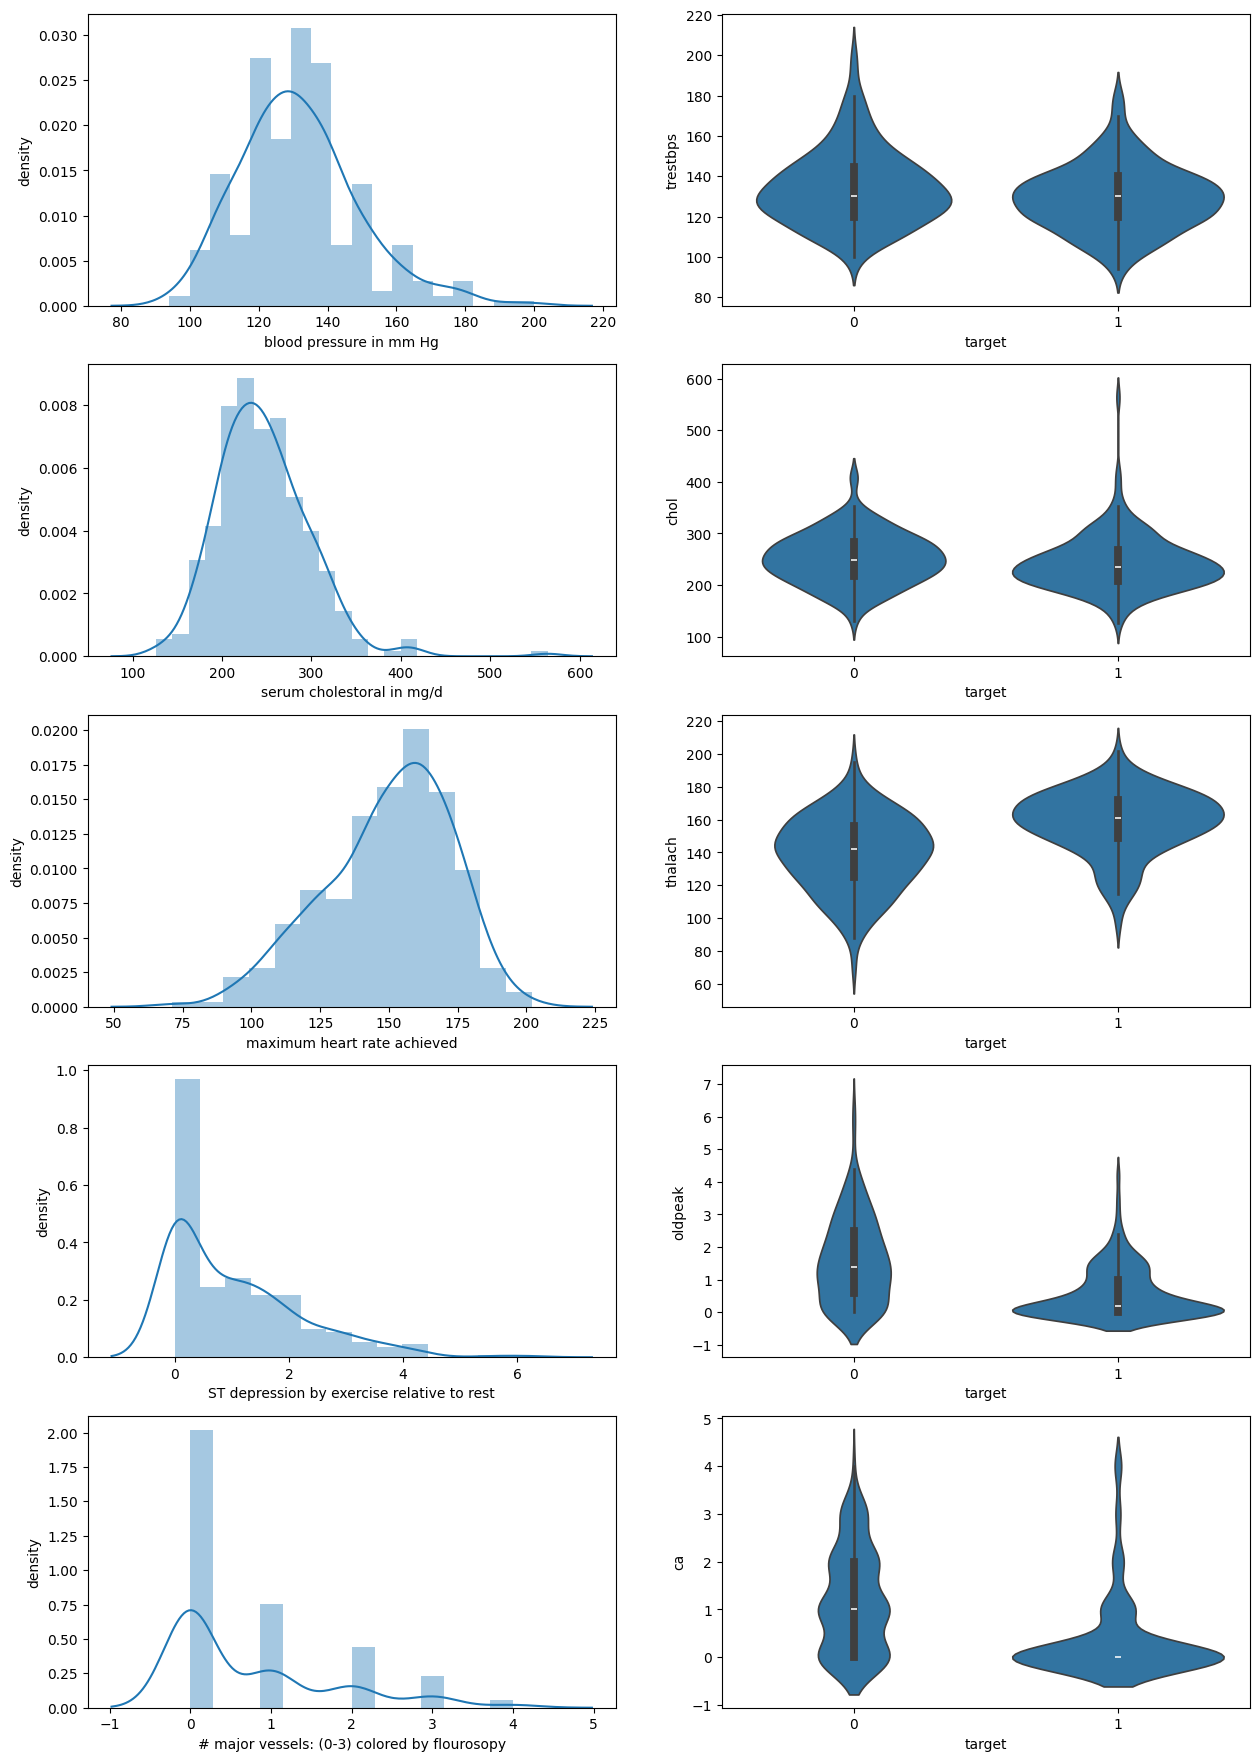

In [29]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))
plotGrid(isCategorial=False)

## **Heart Disease Frequency for ages**

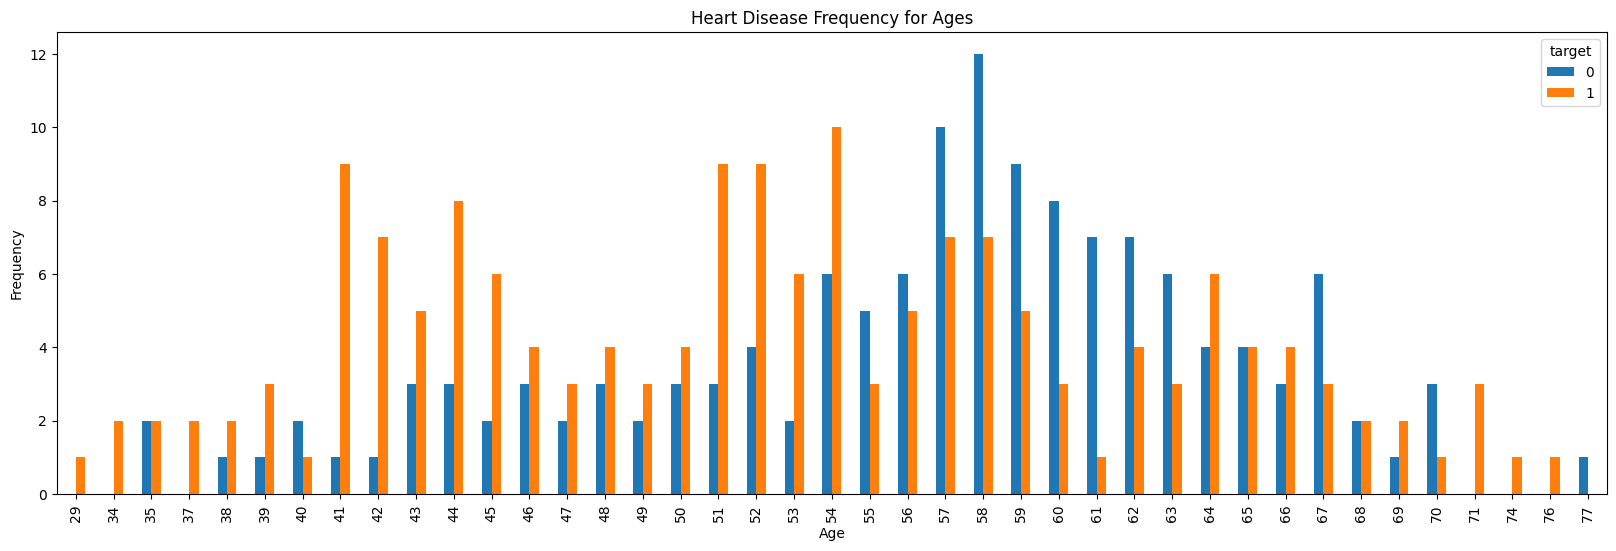

In [30]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# **Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)**

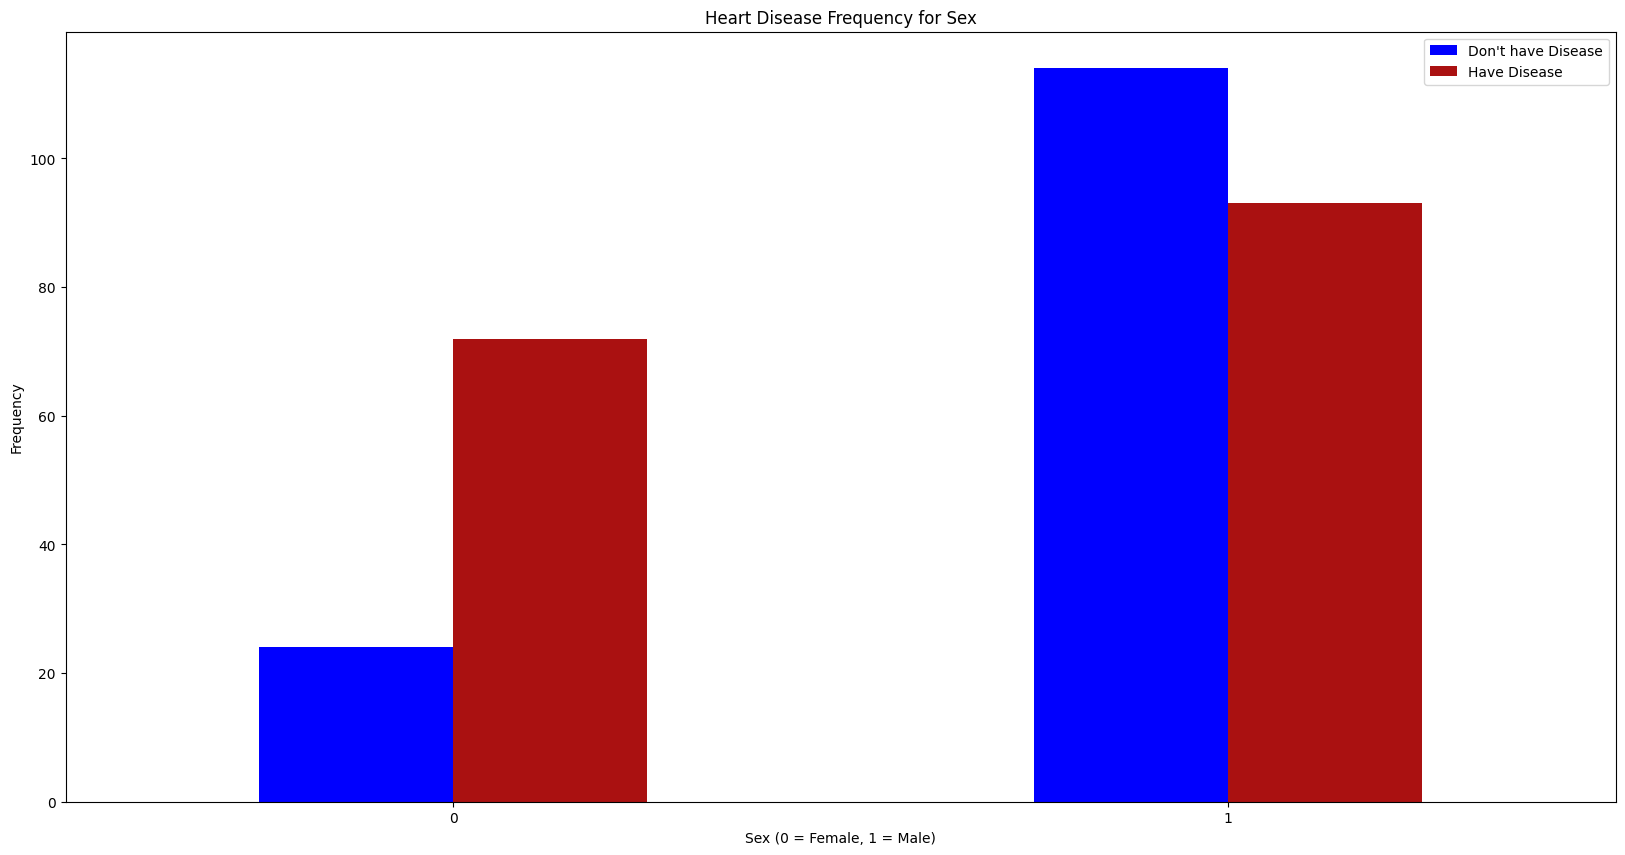

In [31]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [32]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [33]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## **Heart disease according to Fasting Blood sugar**

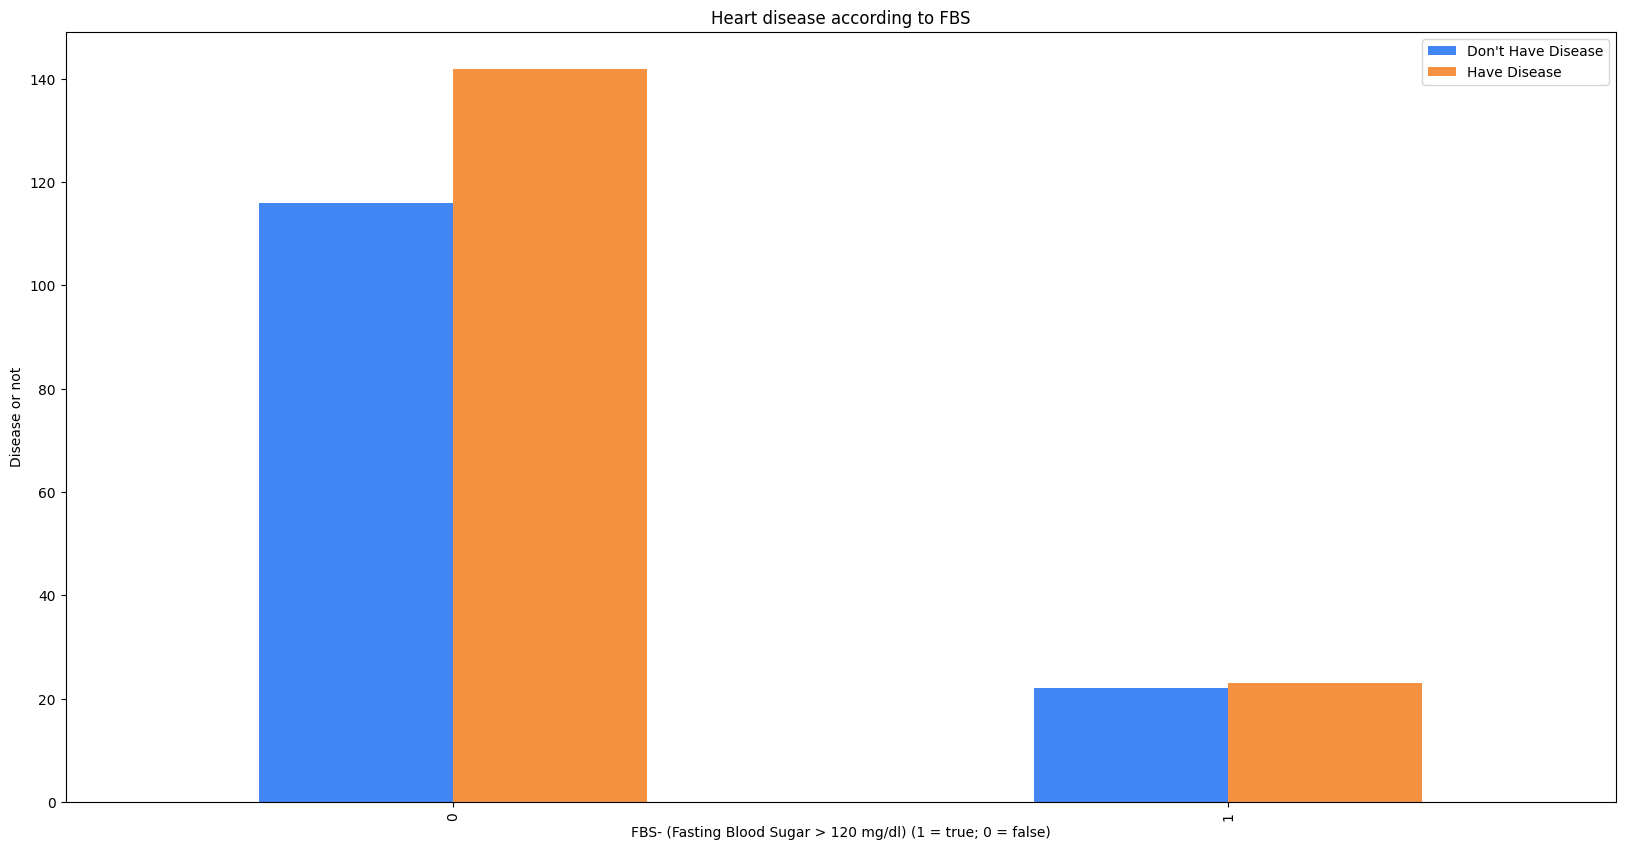

In [34]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# **Analysing the chest pain (4 types of chest pain)**

# **[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]**

In [35]:
data["chest_pain_type"].unique()

array([3, 2, 1, 0])

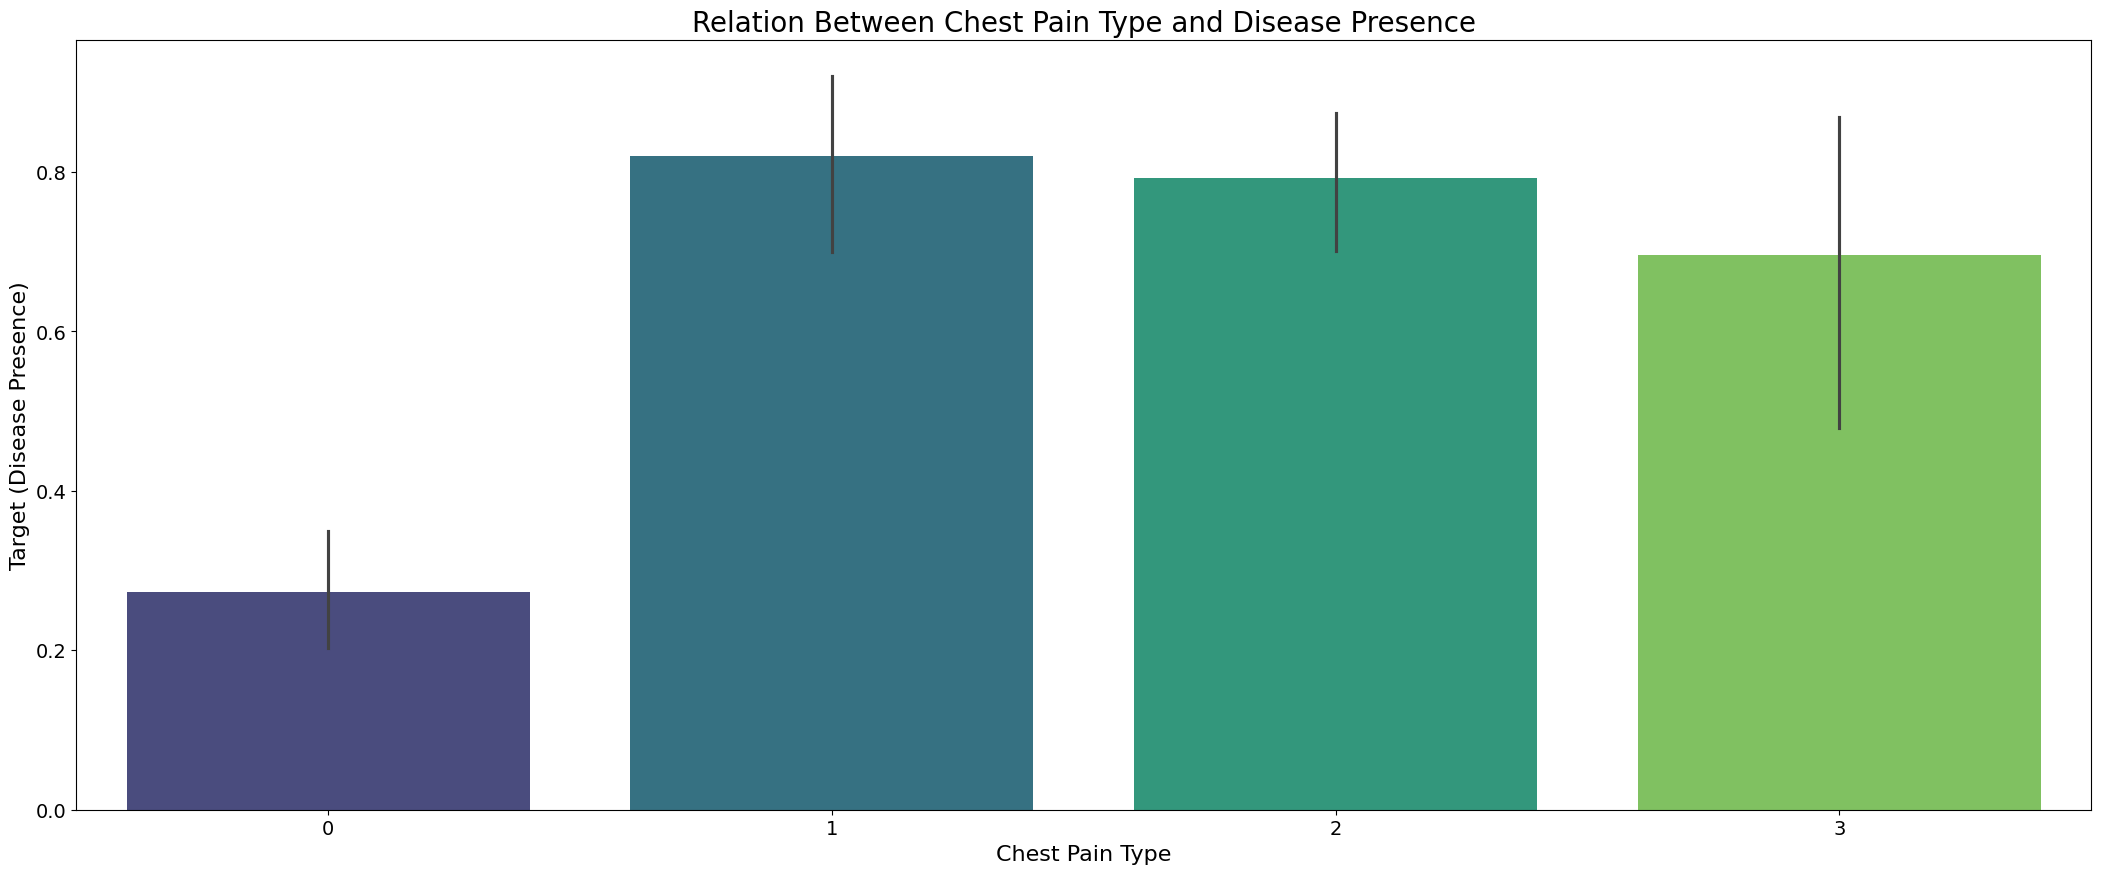

In [36]:
plt.figure(figsize=(26, 10))
sns.barplot(x="chest_pain_type", y="target", data=data, palette="viridis")
plt.xlabel("Chest Pain Type", fontsize=16)
plt.ylabel("Target (Disease Presence)", fontsize=16)
plt.title("Relation Between Chest Pain Type and Disease Presence", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## **Analysing The person's resting blood pressure (mm Hg on admission to the hospital)**

In [37]:
data["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [38]:
data_array = np.array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125,
                       142, 155, 104, 138, 128, 108, 134, 122, 115, 118, 100,
                       124, 94, 112, 102, 152, 101, 132, 148, 178, 129, 180,
                       136, 126, 106, 156, 170, 146, 117, 200, 165, 174, 192,
                       144, 123, 154, 114, 164])

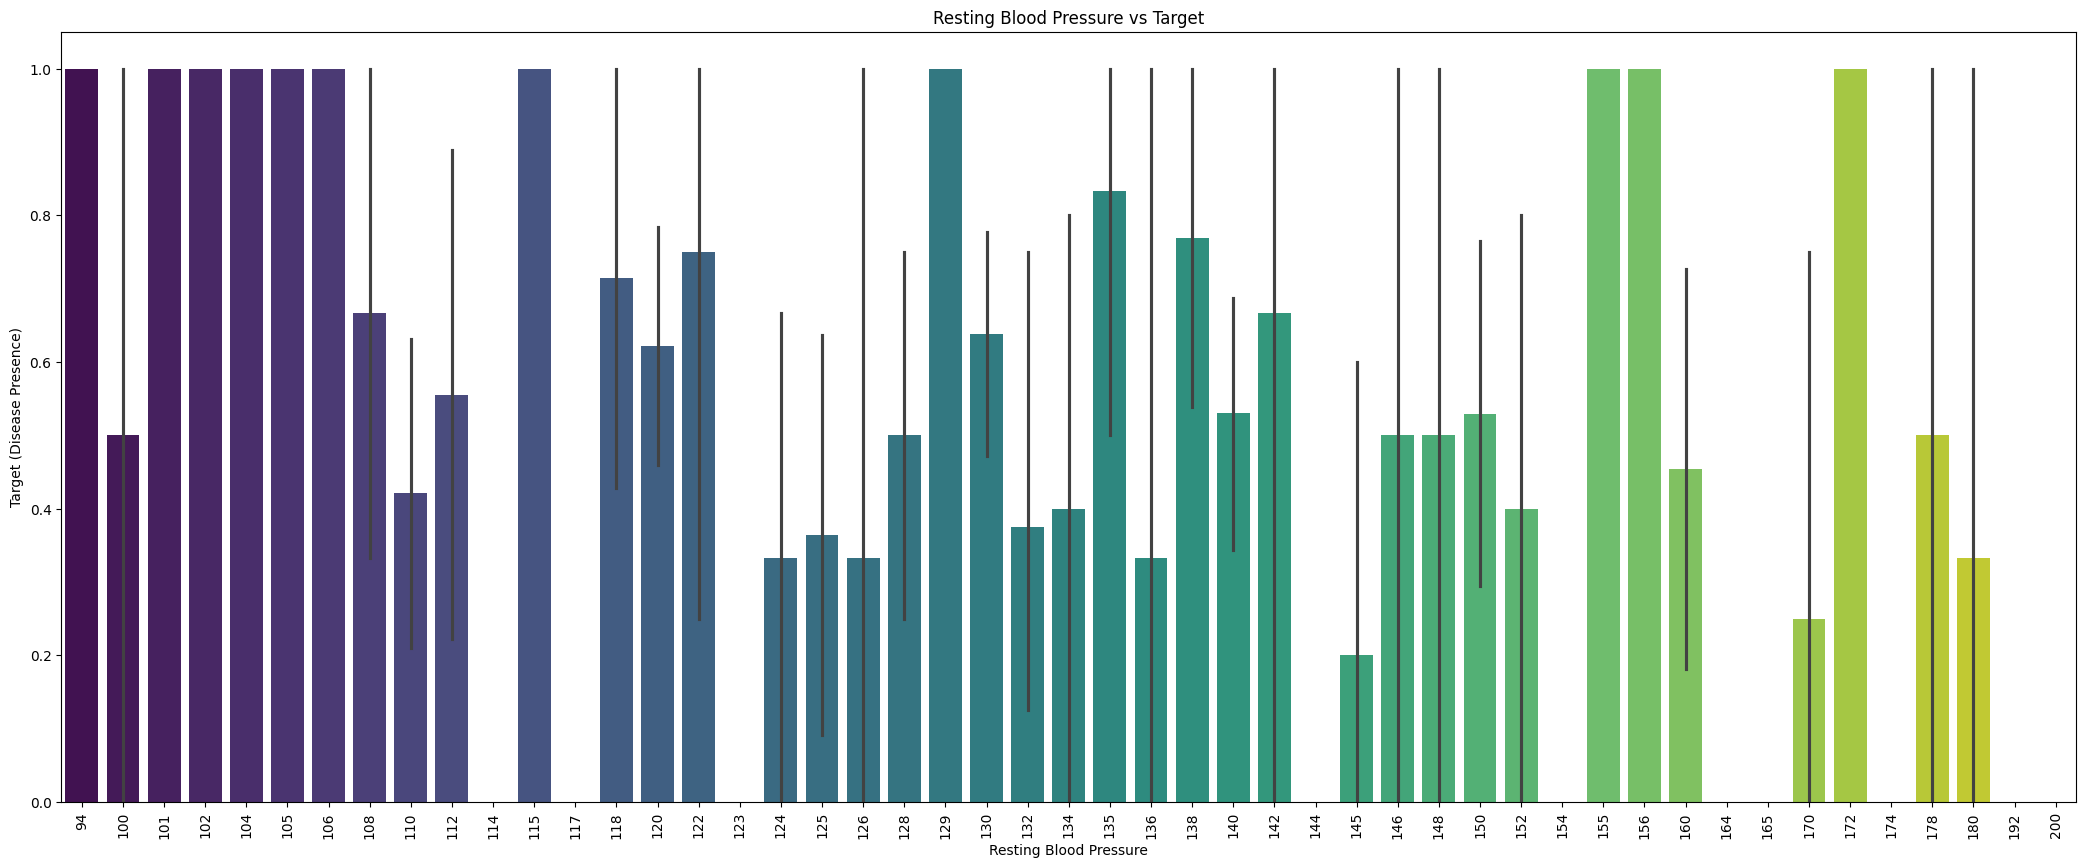

In [39]:
plt.figure(figsize=(26, 10))
sns.barplot(x="resting_blood_pressure", y=y, data=data, palette="viridis")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Target (Disease Presence)")
plt.title("Resting Blood Pressure vs Target")
plt.xticks(rotation=90)
plt.show()

## **Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)**

In [40]:
data["rest_ecg"].unique()

array([0, 1, 2])

<Axes: xlabel='rest_ecg', ylabel='target'>

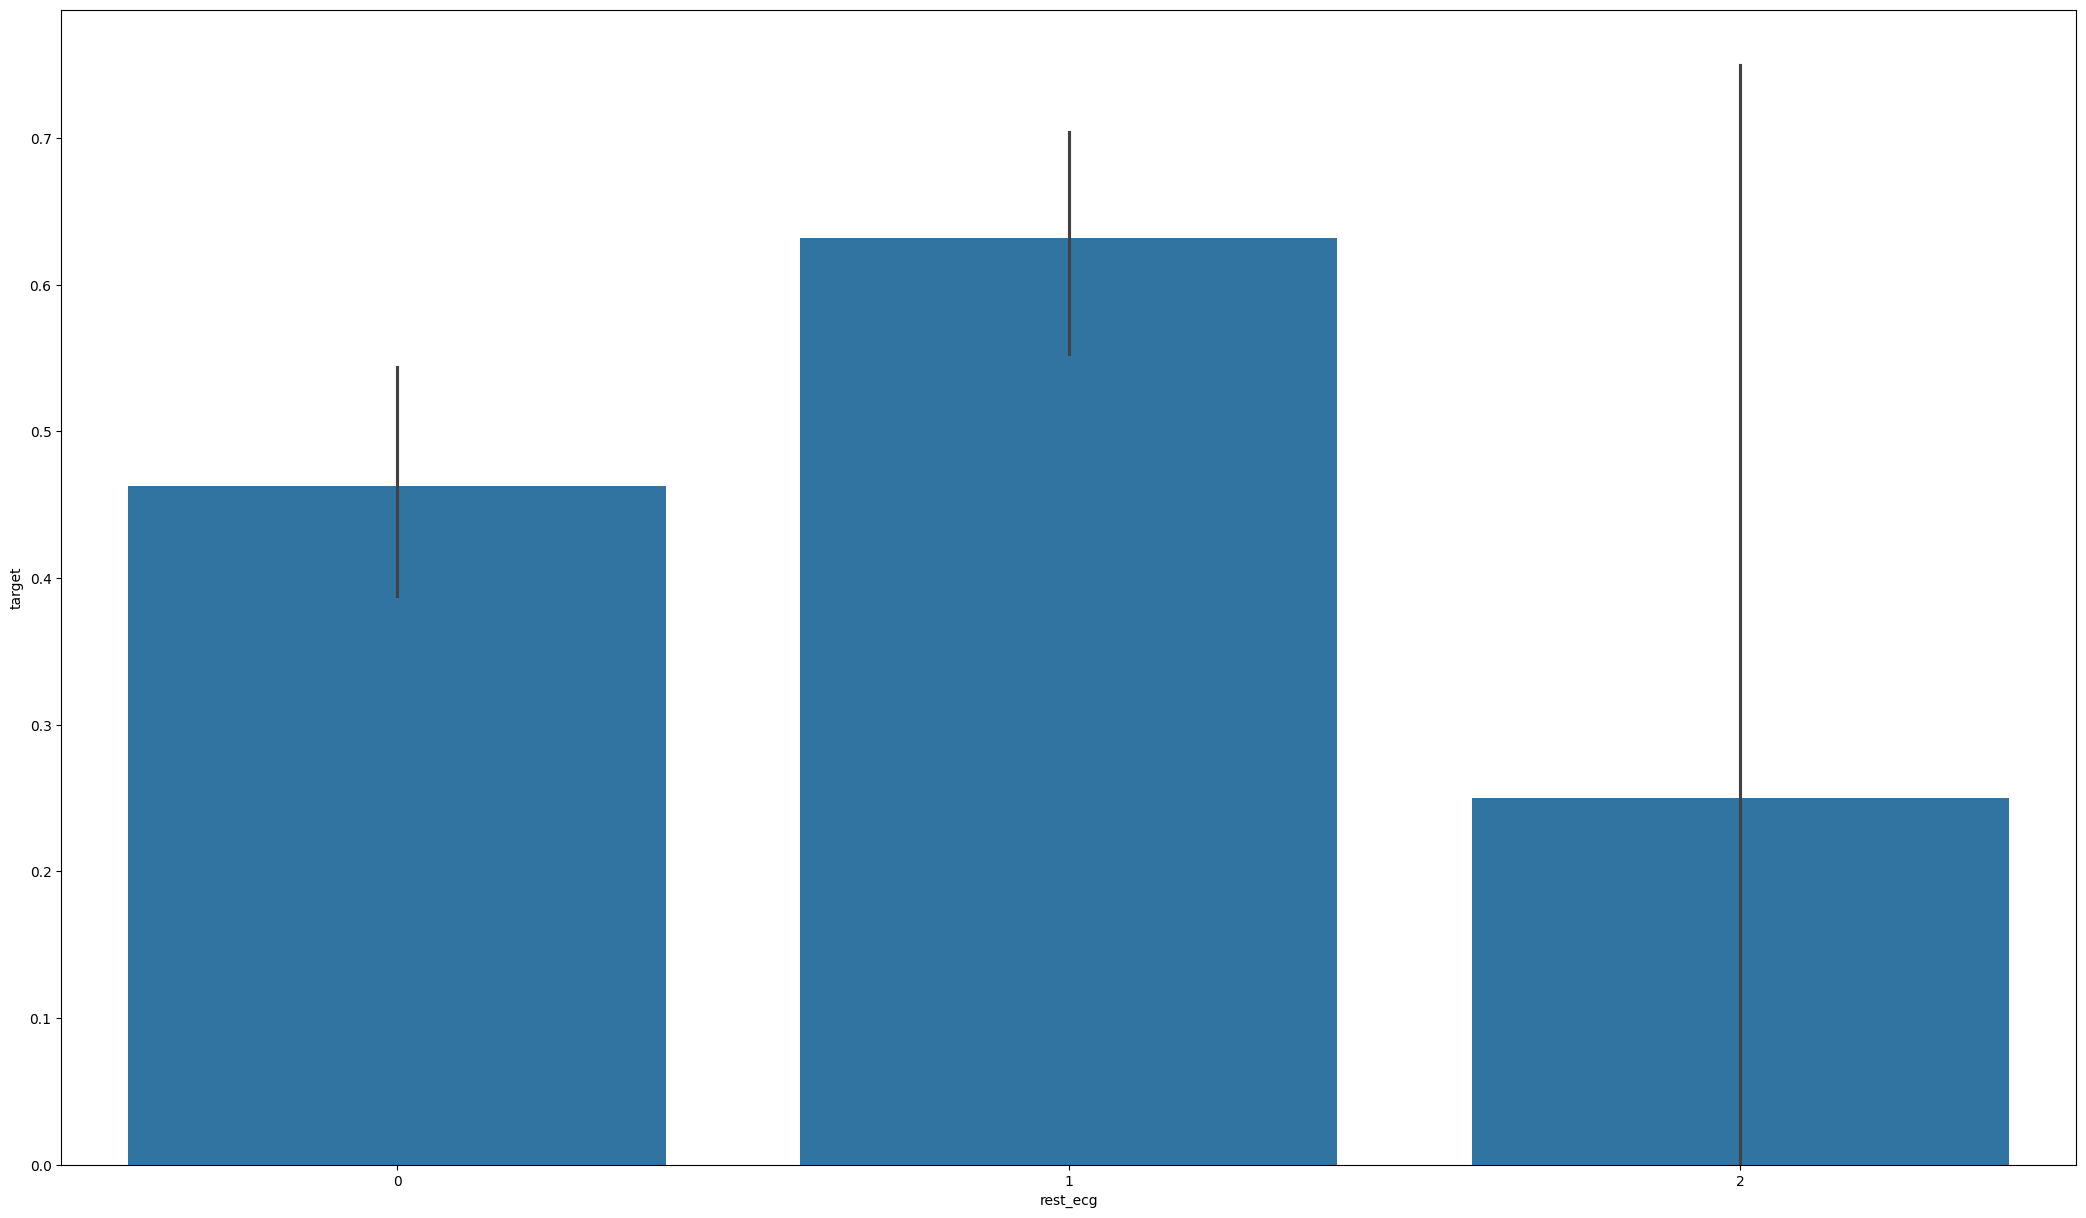

In [41]:
plt.figure(figsize=(26, 15))
sns.barplot(x=data["rest_ecg"], y=y)

people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

# **Analysing Exercise induced angina (1 = yes; 0 = no)**

In [42]:
data["exercise_induced_angina"].unique()

array([0, 1])

<Axes: xlabel='exercise_induced_angina', ylabel='target'>

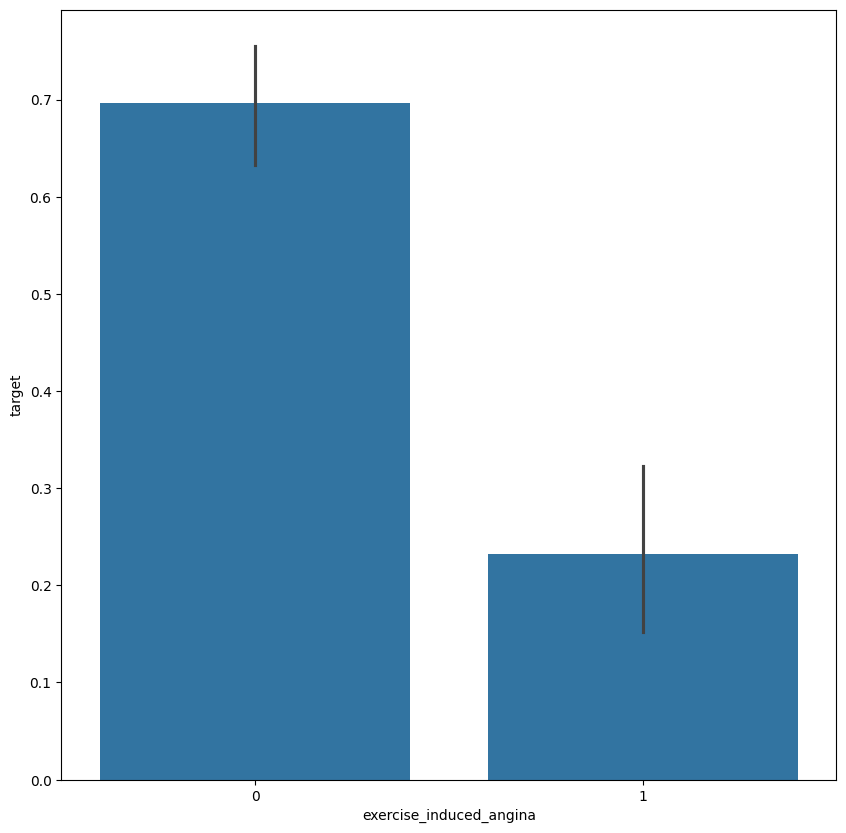

In [43]:
plt.figure(figsize=(10, 10))
sns.barplot(x=data["exercise_induced_angina"], y=data["target"])

People with exercise_induced_angina=1 are much less likely to have heart problems

## **Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)**

In [44]:
data["st_slope"].unique()

array([0, 2, 1])

<Axes: xlabel='st_slope', ylabel='target'>

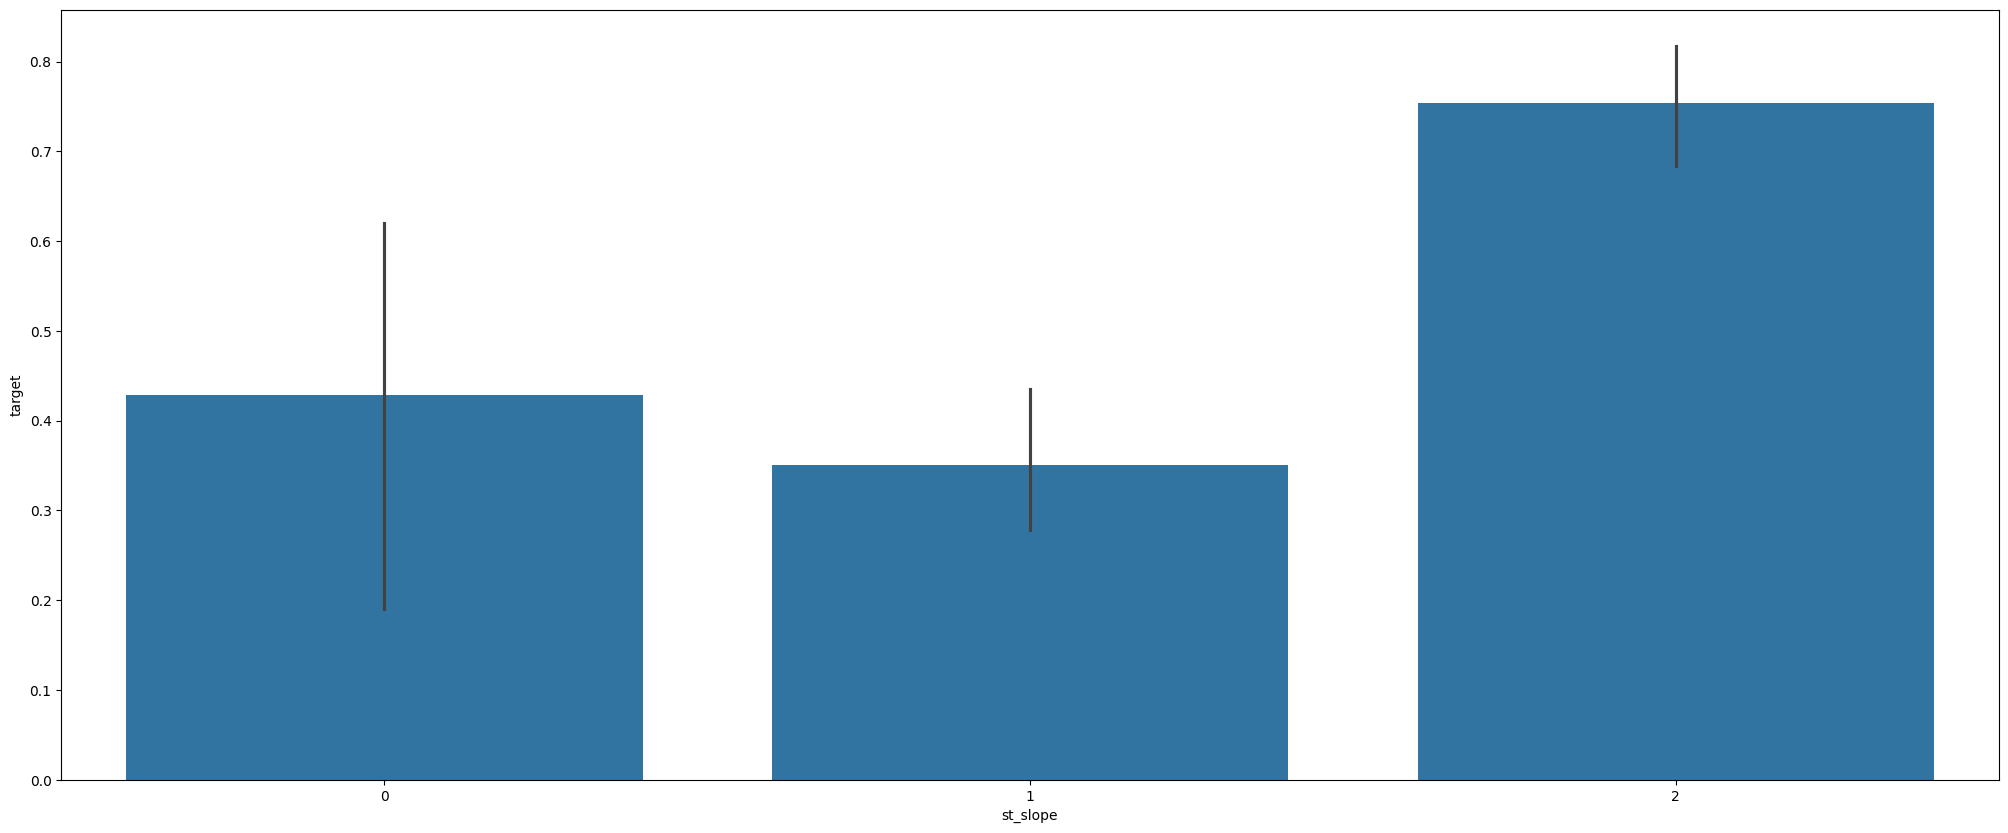

In [45]:
plt.figure(figsize=(25, 10))
sns.barplot(x=data["st_slope"],y=data["target"])


# **Analysing number of major vessels (0-3) colored by flourosopy**

In [47]:
data["num_major_vessels"].unique()

array([0, 2, 1, 3, 4])

<Axes: xlabel='num_major_vessels', ylabel='count'>

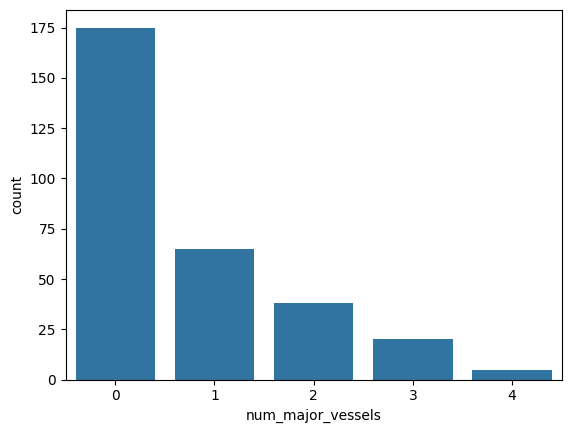

In [49]:
sns.countplot(x=data["num_major_vessels"])

### **Comparing with target**

<Axes: xlabel='num_major_vessels', ylabel='target'>

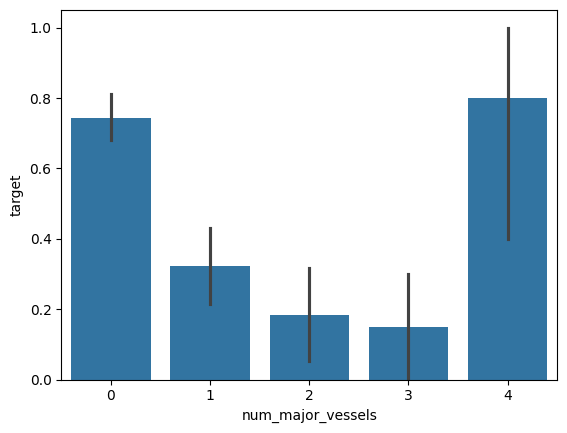

In [50]:
sns.barplot(x=data["num_major_vessels"],y=data["target"])

### **num_major_vessels=4 has astonishingly large number of heart patients**

## **Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)**

In [51]:
data["thalassemia"].unique()

array([1, 2, 3, 0])

### plotting the thalassemia distribution (0,1,2,3)

<Axes: xlabel='thalassemia', ylabel='Density'>

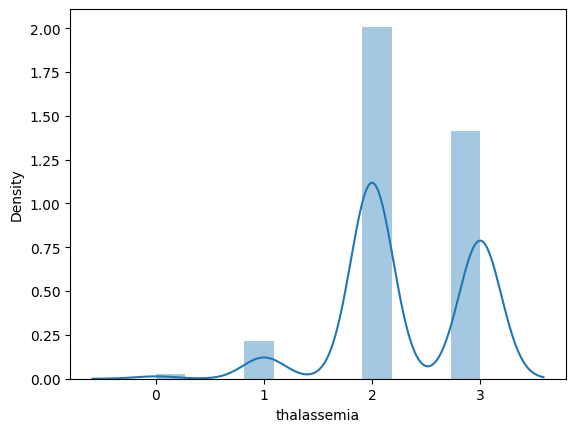

In [52]:
sns.distplot(data["thalassemia"])

### comparing with target

<Axes: xlabel='thalassemia', ylabel='target'>

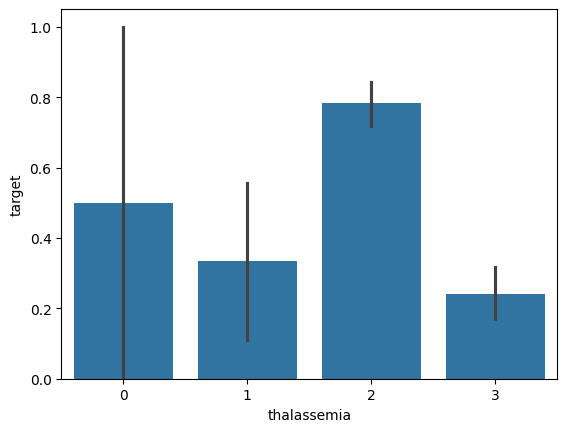

In [53]:
sns.barplot(x=data["thalassemia"],y=data["target"])

## thalassemia and cholesterol scatterplot

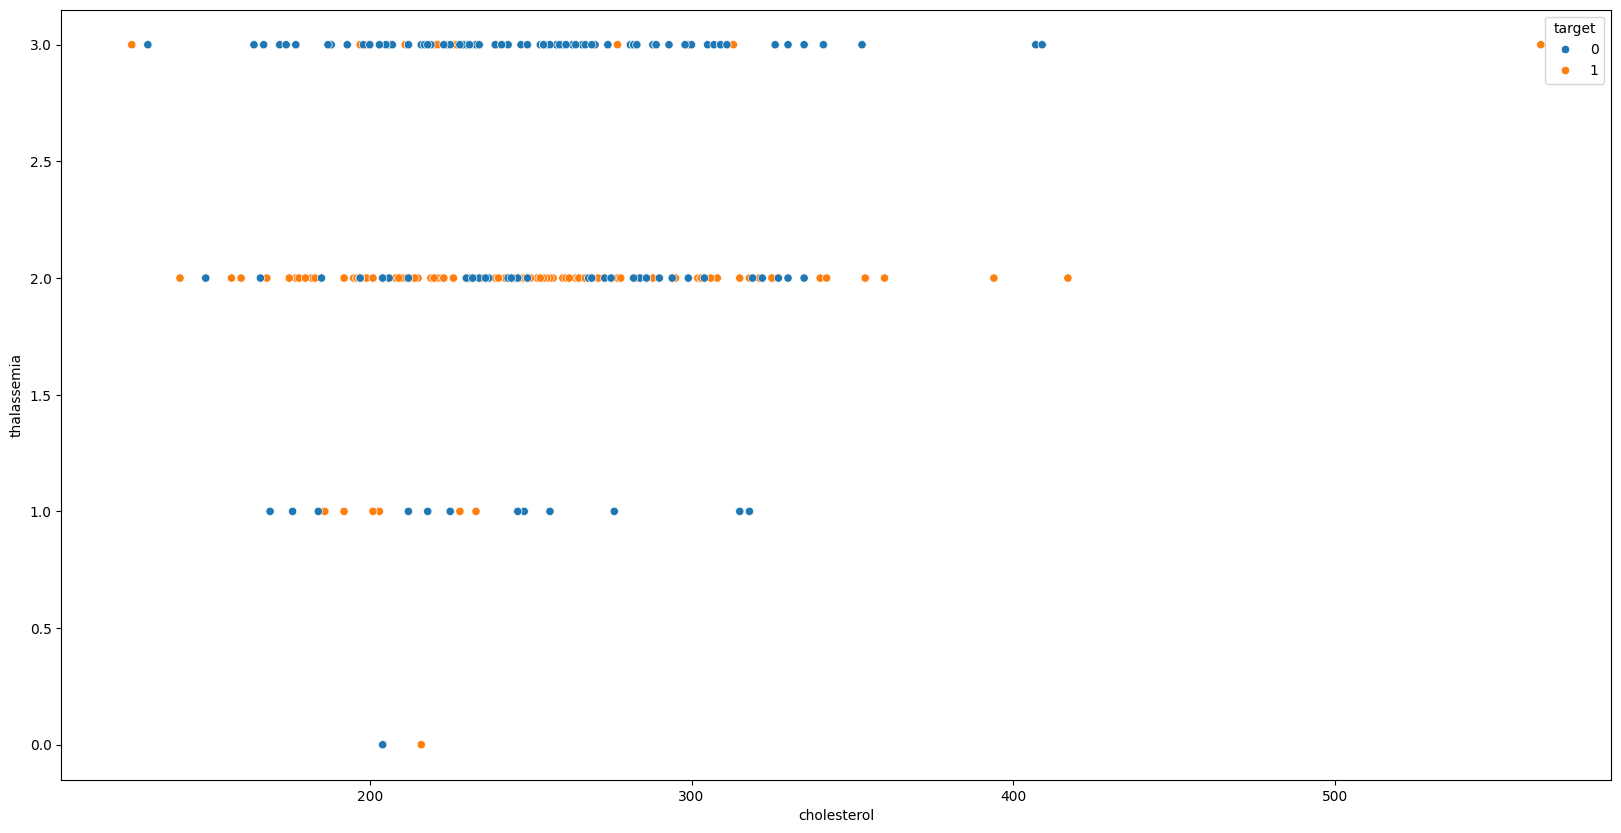

In [54]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

## thalassemia vs resting blood pressure scatterplot

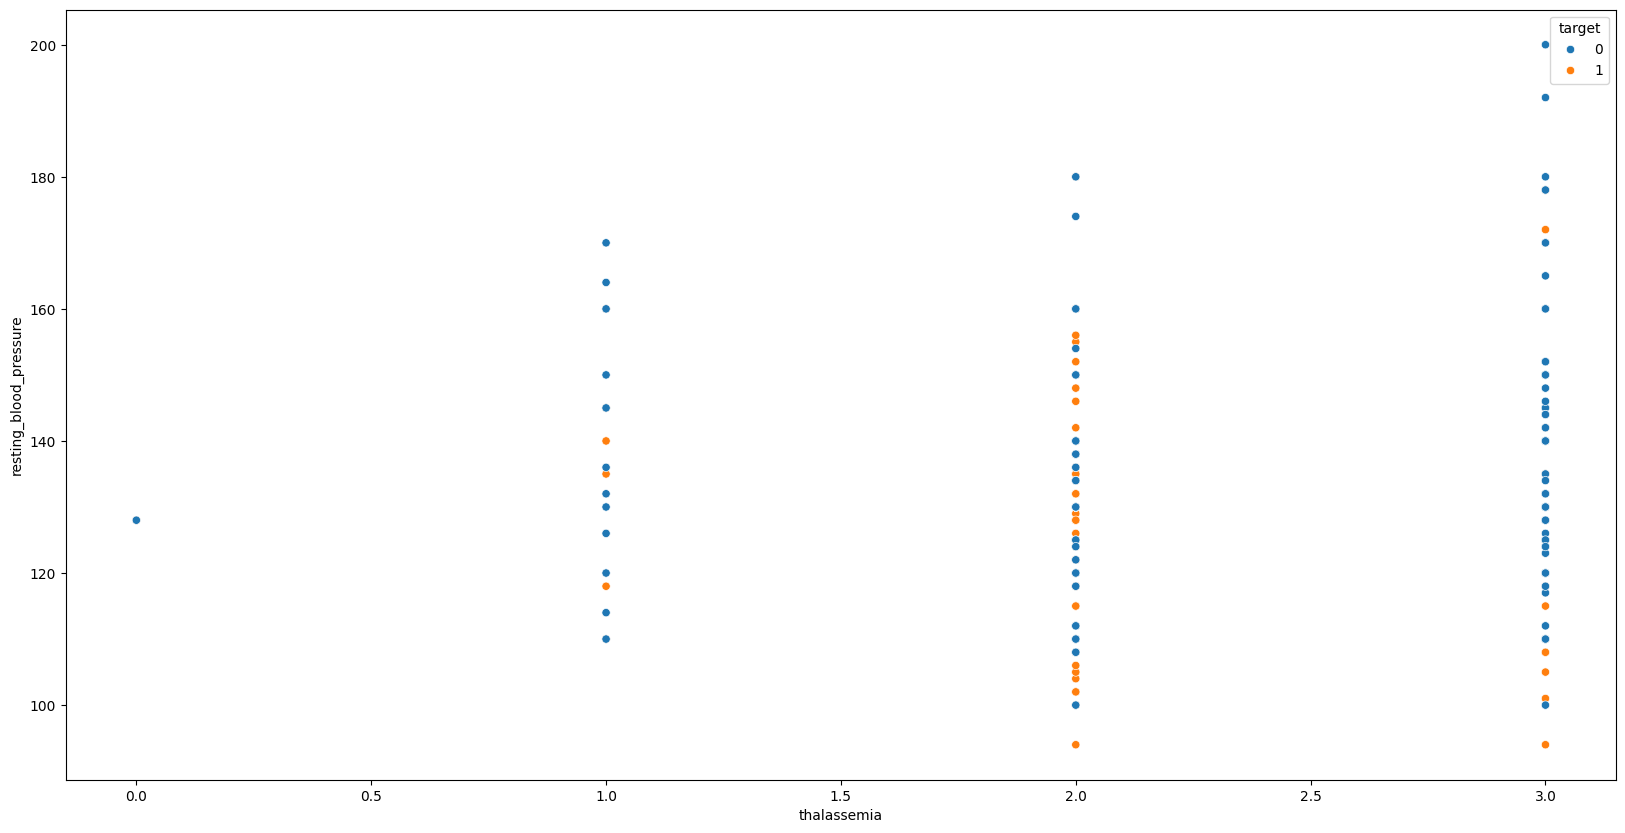

In [55]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

## Health rate vs Age

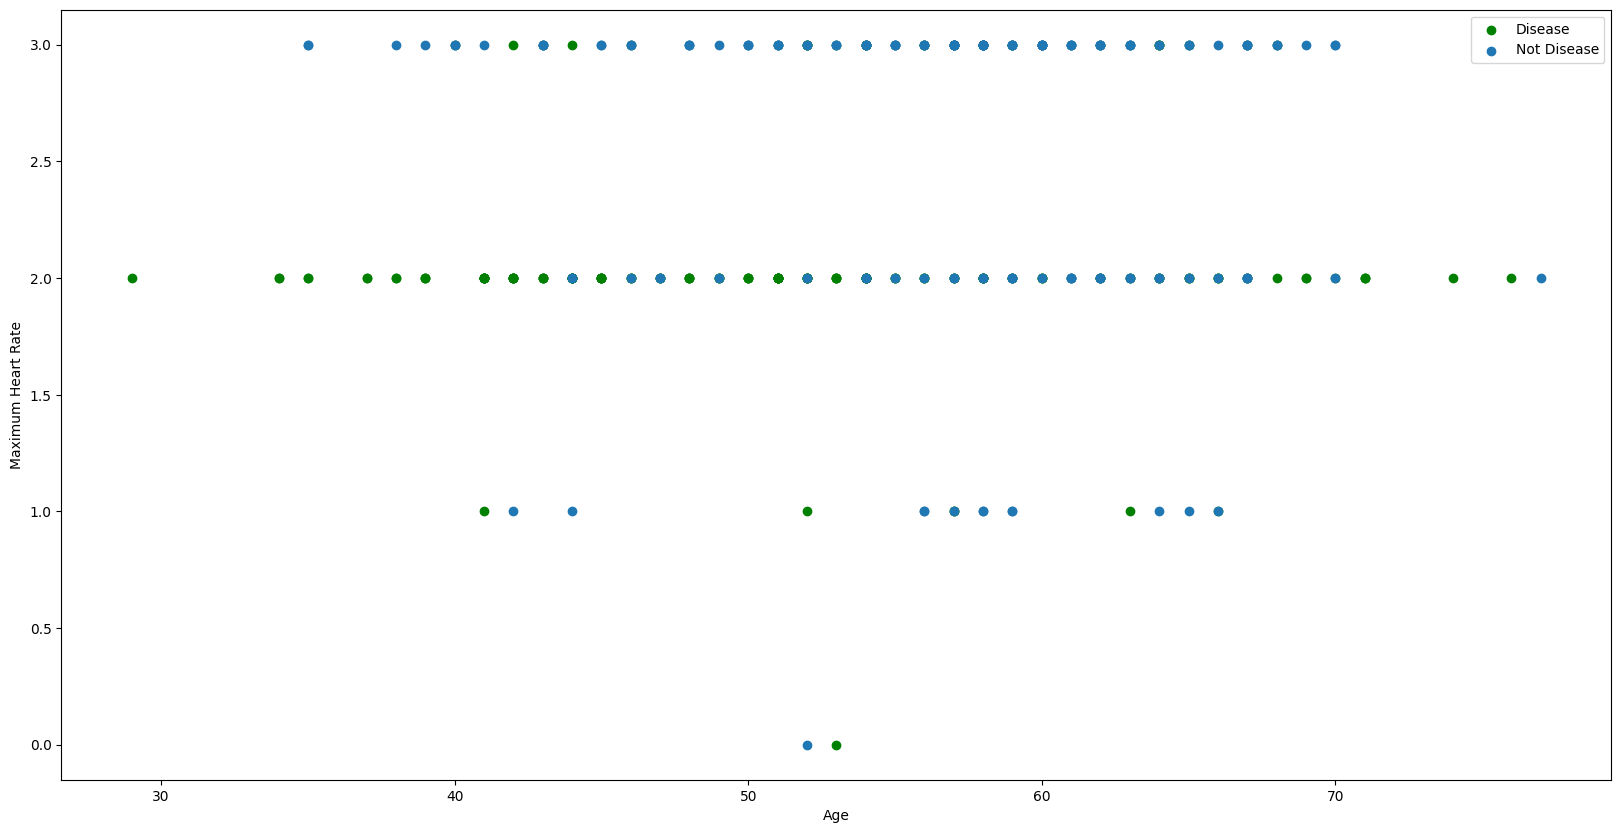

In [56]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

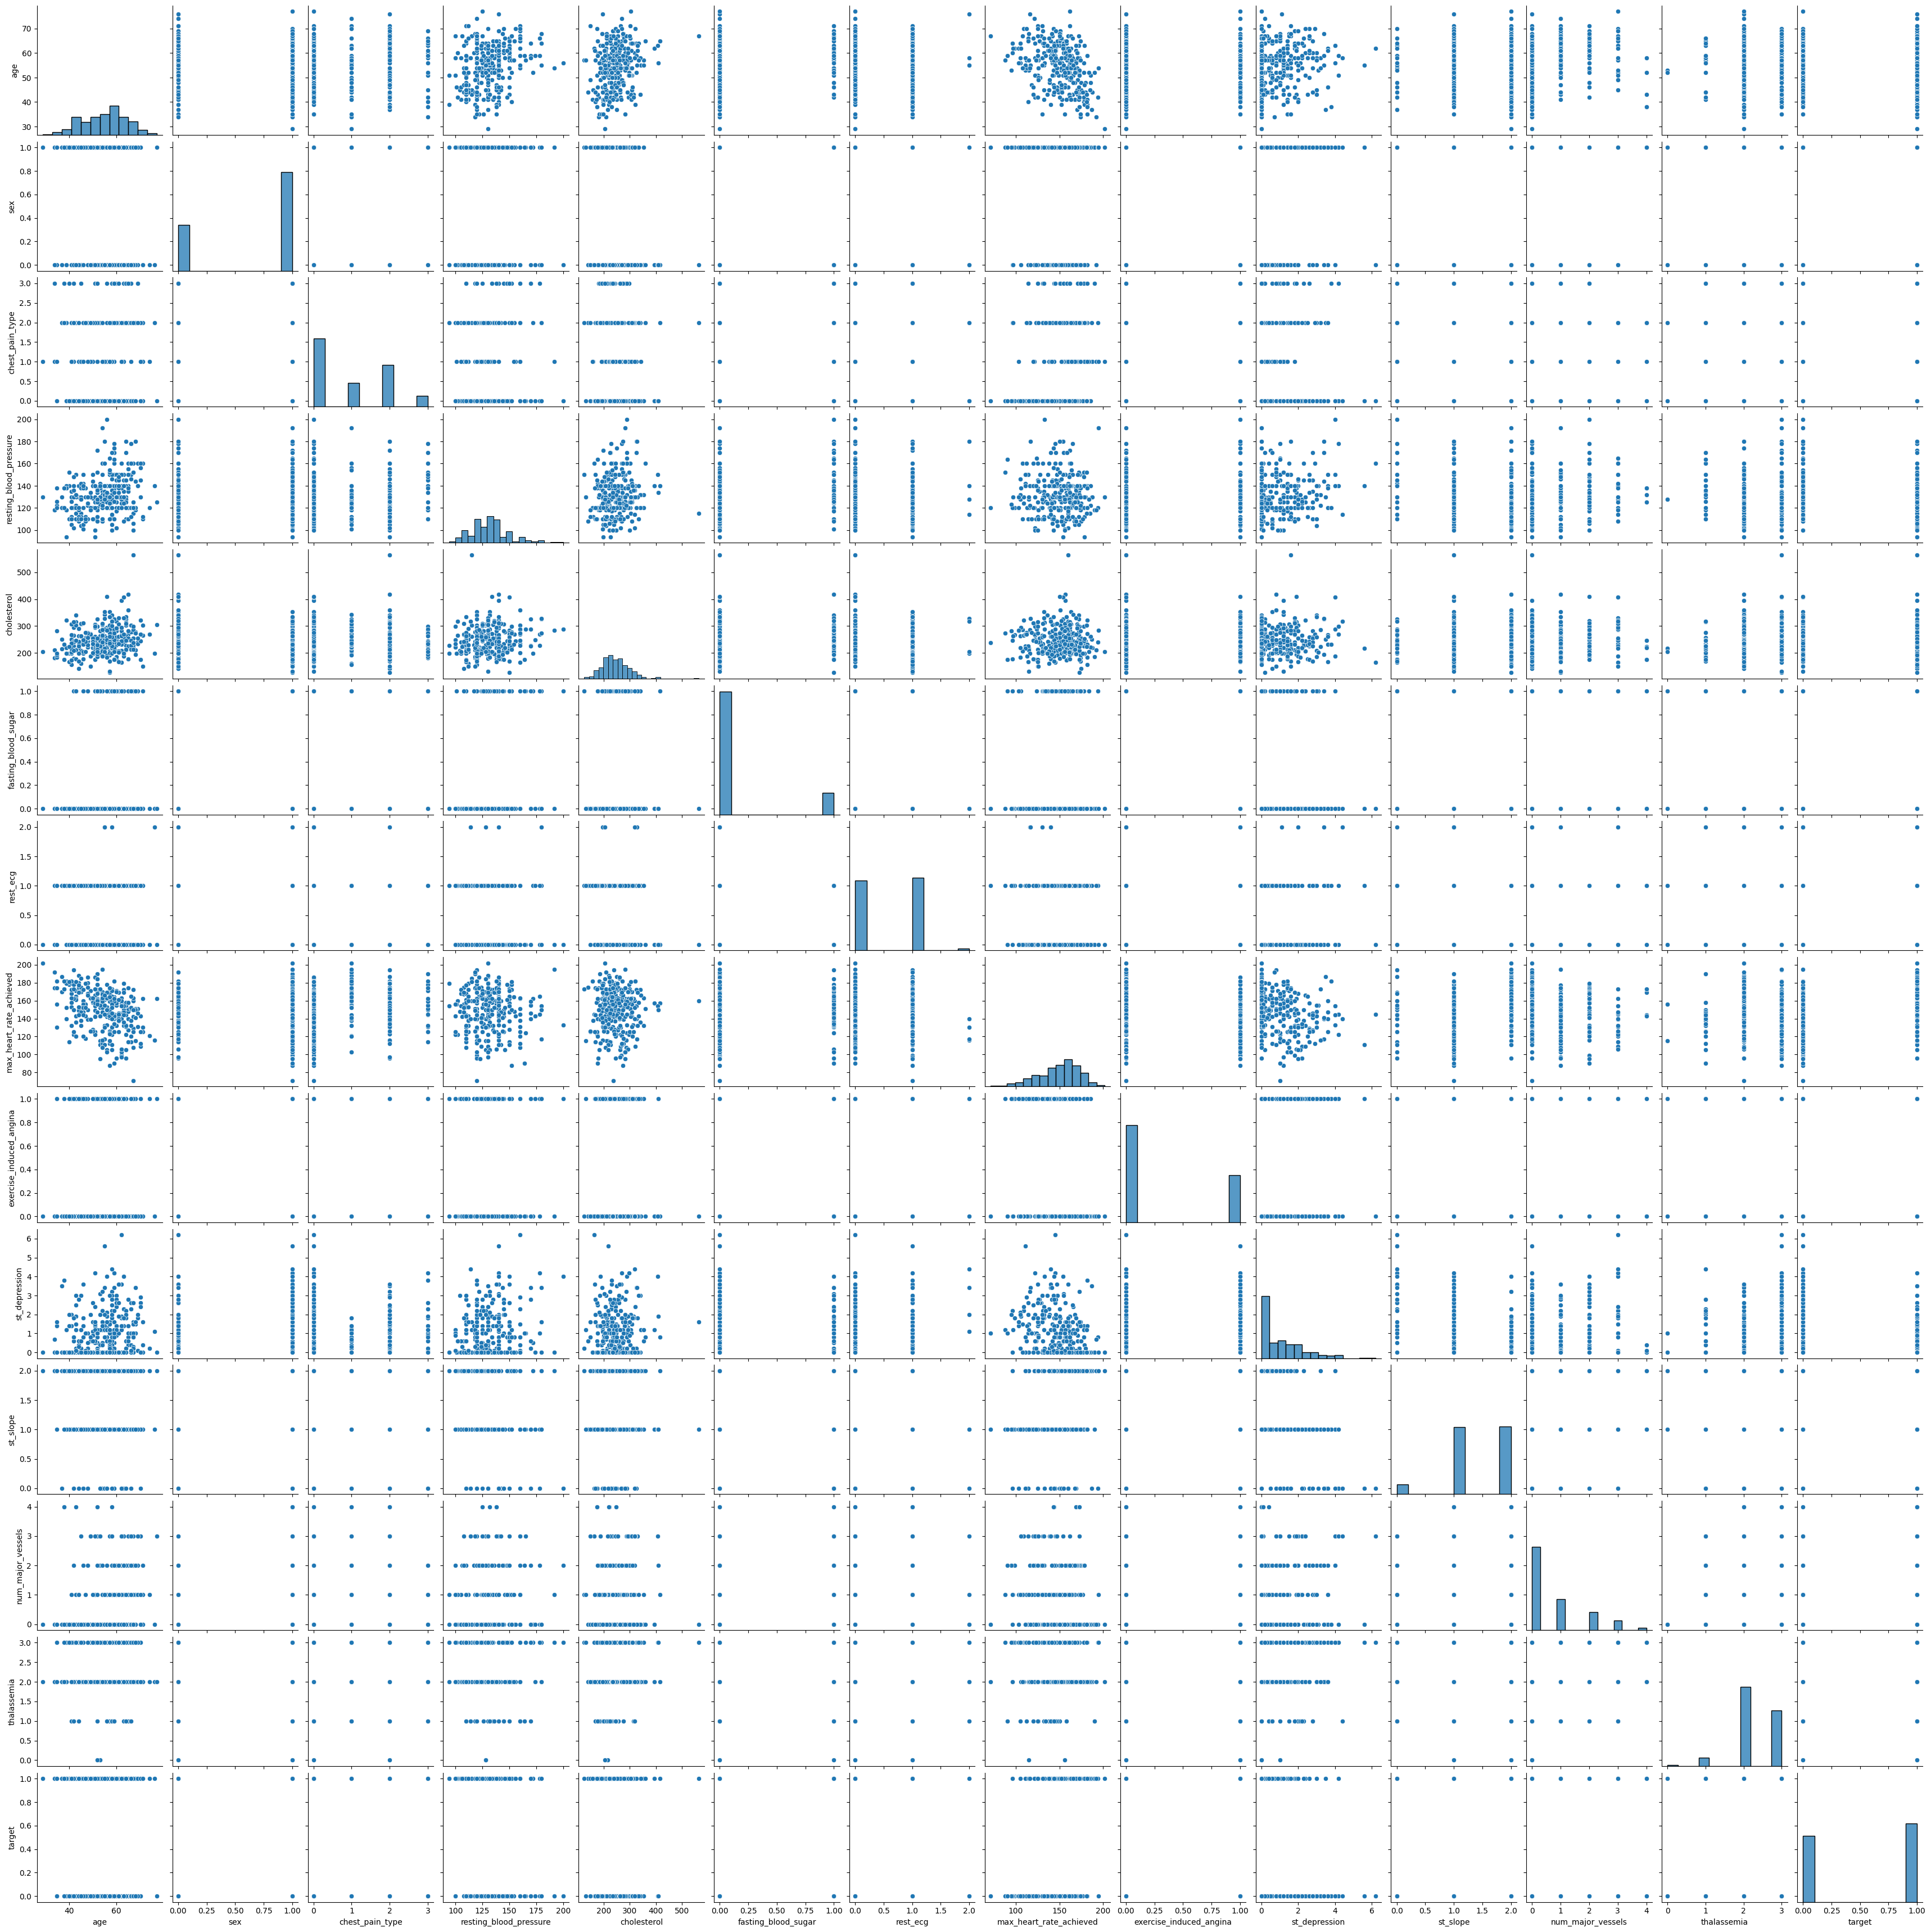

In [57]:
sns.pairplot(data=data)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest_pain_type'}>,
        <Axes: title={'center': 'resting_blood_pressure'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting_blood_sugar'}>,
        <Axes: title={'center': 'rest_ecg'}>,
        <Axes: title={'center': 'max_heart_rate_achieved'}>],
       [<Axes: title={'center': 'exercise_induced_angina'}>,
        <Axes: title={'center': 'st_depression'}>,
        <Axes: title={'center': 'st_slope'}>,
        <Axes: title={'center': 'num_major_vessels'}>],
       [<Axes: title={'center': 'thalassemia'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

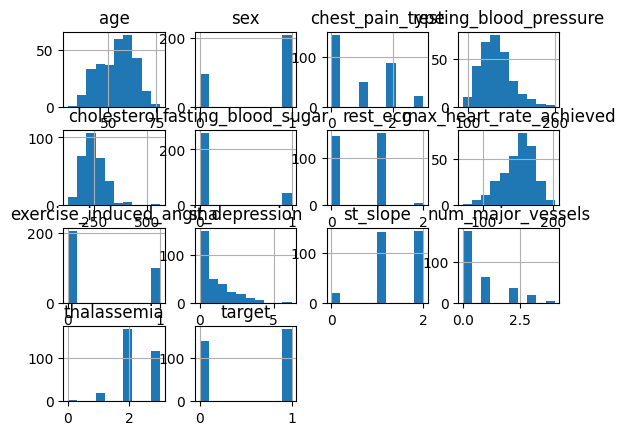

In [58]:
data.hist()

# **Correlation plot**



Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)


In [60]:
#store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

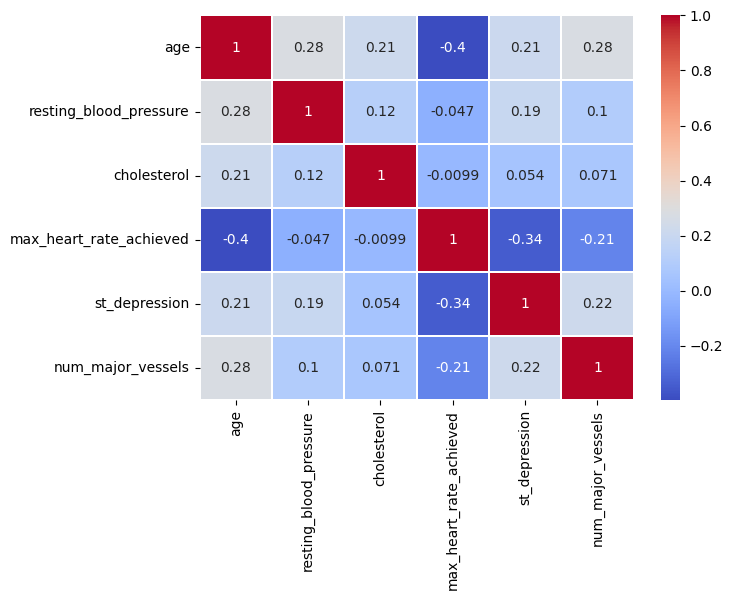

In [61]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

# **Correlation analysis**

In [62]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


# **Splitting the dataset to Train and Test**

In [275]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [276]:
X_train.shape

(242, 13)

In [277]:
X_test.shape

(61, 13)

In [278]:
Y_train.shape

(242,)

In [279]:
Y_test.shape

(61,)

## importing Accuracy score

In [280]:
from sklearn.metrics import accuracy_score

# Modelling and predicting with Machine Learning

The primary goal of this project is to accurately predict the occurrence of heart disease. To achieve this, we will evaluate multiple classification algorithms. This section presents the results obtained from testing various models and highlights the best-performing algorithm based on the accuracy metric.

We will utilize several common classification algorithms, which are widely used for supervised learning tasks.

To streamline the process, we will create a general function for training the models. By evaluating accuracy on both the training and testing sets, we can determine if a model is overfitting or underfitting the data—thus addressing the bias-variance tradeoff.

In [281]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):

    # instantiate model
    model = classifier(**kwargs)

    # train model
    model.fit(X_train,y_train)

    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")

    return model


# **Logistic regression**

In [282]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [283]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [284]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 84.71%
Test accuracy: 85.25%


In [285]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72
clf = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(X_test, Y_test)
print(f"Accuracy on test set: {clf.score(X_test, Y_test)}")

Accuracy on test set: 0.9344262295081968


# Confusion Matrix

In [286]:
from sklearn.metrics import confusion_matrix

In [287]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

In [288]:
matrix = confusion_matrix(Y_test, y_pred_lr)

<Axes: >

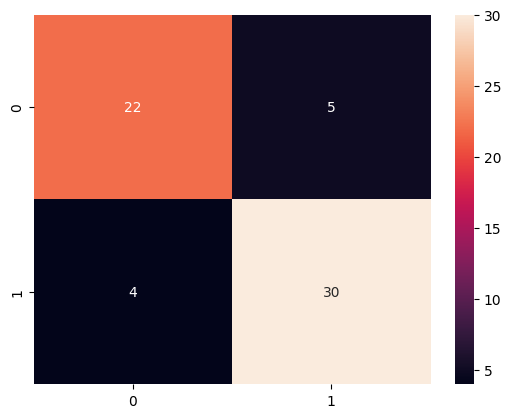

In [289]:
sns.heatmap(matrix, annot=True, fmt="d")

## Precision Score

In [290]:
from sklearn.metrics import precision_score

In [291]:
precision = precision_score(Y_test, y_pred_lr)

print("Precision: ",precision)

Precision:  0.8571428571428571


# Recall

In [292]:
from sklearn.metrics import recall_score

In [293]:
recall = recall_score(Y_test, y_pred_lr)

In [294]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706


# F-Score

balance of precision and recall score

In [295]:
print((2*precision*recall)/(precision+recall))

0.8695652173913043


In [296]:
CM =pd.crosstab(Y_test, y_pred_lr)
CM

col_0,0,1
target,,
0,22,5
1,4,30


In [297]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [298]:
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# Random Forest

In [302]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


# Learning curve for Training score & cross validation score

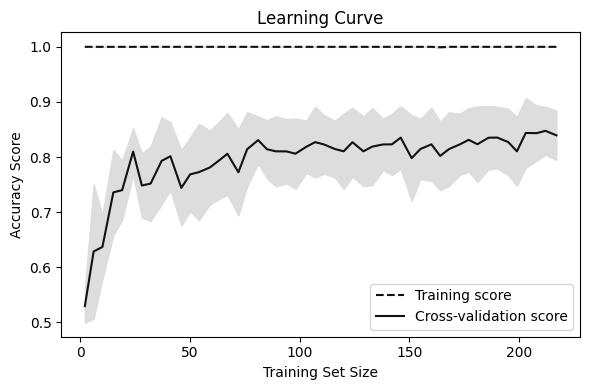

In [303]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(
   RandomForestClassifier(), X_train, Y_train,
   cv=10,
   scoring='accuracy',
   n_jobs=-1,
   train_sizes=np.linspace(0.01, 1.0, 50)
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Naive Bayes

In [304]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 83.47%
Test accuracy: 85.25%
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [305]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [306]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 83.47%
Test accuracy: 85.25%


## confusion matrix of Naive Bayes

In [307]:
from sklearn.metrics import confusion_matrix

In [308]:
matrix= confusion_matrix(Y_test, y_pred_nb)

<Axes: >

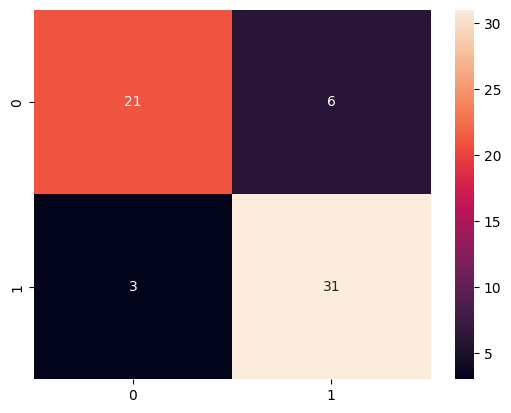

In [309]:
sns.heatmap(matrix,annot = True, fmt = "d")

## Precision Score

In [310]:
from sklearn.metrics import precision_score


In [311]:
precision = precision_score(Y_test, y_pred_nb)

In [312]:
print("Precision: ",precision)

Precision:  0.8378378378378378


## Recall

In [313]:
from sklearn.metrics import recall_score

In [314]:
recall = recall_score(Y_test, y_pred_nb)

In [315]:
print("Recall is: ",recall)

Recall is:  0.9117647058823529


## f score

In [316]:
print((2*precision*recall)/(precision+recall))

0.8732394366197184


In [317]:
CM = pd.crosstab(Y_test, y_pred_nb)
CM

col_0,0,1
target,,
0,21,6
1,3,31


In [318]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [319]:
fnr = FN*100/(FN+TP)
fnr

8.823529411764707

# KNN(K Nearest Neighbors)

In [320]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 71.90%
Test accuracy: 68.85%
[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


In [321]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


In [322]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 78.10%
Test accuracy: 63.93%


In [323]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 52.46%
n_neigbors = 2
Train accuracy: 79.75%
Test accuracy: 60.66%
n_neigbors = 3
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 4
Train accuracy: 76.03%
Test accuracy: 63.93%
n_neigbors = 5
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 6
Train accuracy: 74.38%
Test accuracy: 65.57%
n_neigbors = 7
Train accuracy: 72.31%
Test accuracy: 67.21%
n_neigbors = 8
Train accuracy: 71.90%
Test accuracy: 68.85%
n_neigbors = 9
Train accuracy: 73.14%
Test accuracy: 67.21%


## Confusion Matrix

In [324]:
from sklearn.metrics import confusion_matrix

<Axes: >

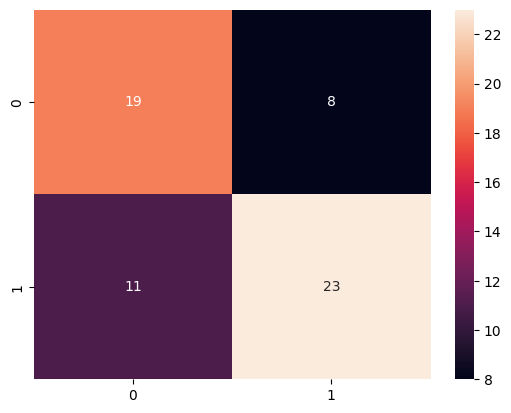

In [325]:
matrix= confusion_matrix(Y_test, y_pred_knn)
sns.heatmap(matrix,annot = True, fmt = "d")


## Precision Score

In [326]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred_knn)
print("Precision: ",precision)

Precision:  0.7419354838709677


## Recall

In [328]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, y_pred_knn)
print("Recall is: ",recall)

Recall is:  0.6764705882352942


## F Score

In [329]:
print((2*precision*recall)/(precision+recall))

0.7076923076923077


In [330]:
CM = pd.crosstab(Y_test, y_pred_knn)
CM

col_0,0,1
target,,
0,19,8
1,11,23


In [331]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [332]:
fnr = FN*100/(FN+TP)
fnr

32.35294117647059

# FINAL SCORE

In [339]:
accuracy = []

# List of algorithm names
classifiers = ['KNN', 'Logistic Regression', 'Naive Bayes']

models = [
    KNeighborsClassifier(n_neighbors=8),
    LogisticRegression(),
    GaussianNB()
]

for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

# Create a DataFrame from the accuracy results
summary = pd.DataFrame({'accuracy': accuracy}, index=classifiers)
print(summary)


                     accuracy
KNN                  0.688525
Logistic Regression  0.852459
Naive Bayes          0.852459


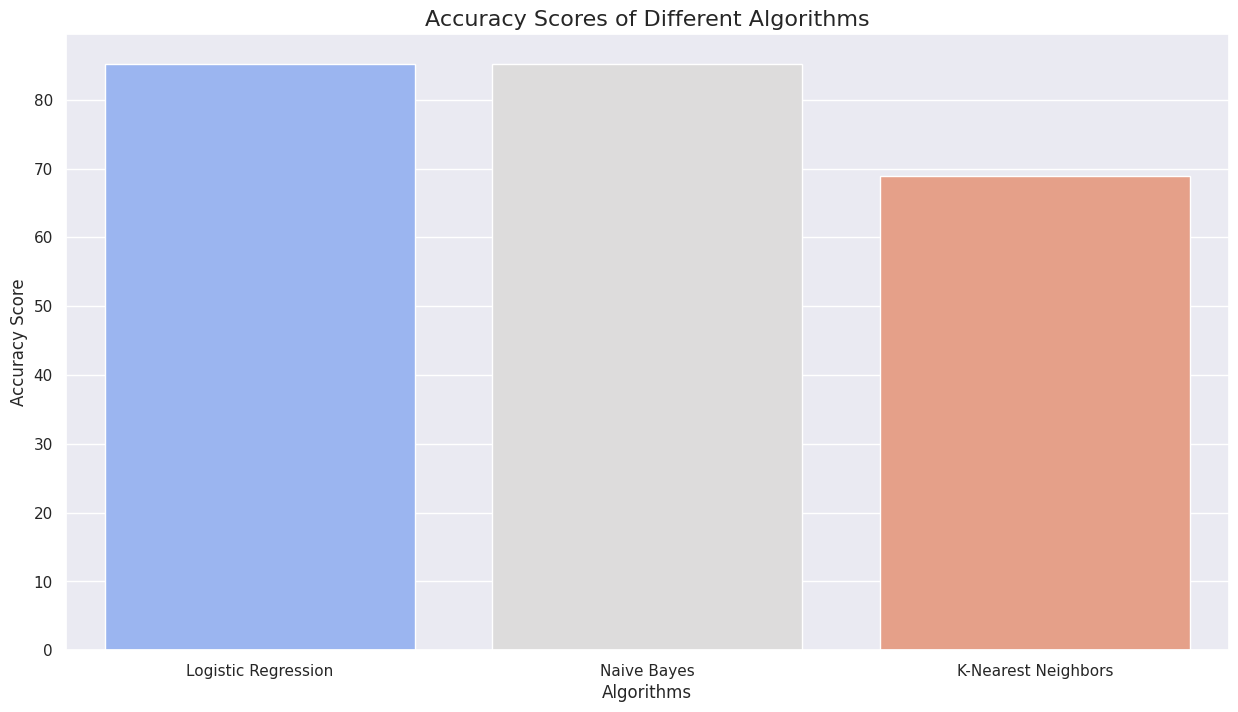

In [341]:
scores = [score_lr, score_nb, score_knn]
algorithms = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors"]
sns.set(rc={'figure.figsize': (15, 8)})

plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

sns.barplot(x=algorithms, y=scores, palette="coolwarm")

plt.title("Accuracy Scores of Different Algorithms", fontsize=16)
plt.show()


# F1 Score

#Logistic Regression : 0.869

#Naive Bayes : 0.873

#KNN : 0.707


---


#So Naive Bayes is the Best,
#And here KNN is the worst algorithm